<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/image_colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -qq modelscope timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.2 MB/s eta 0:00:00


In [11]:
import os
import cv2
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks
import matplotlib.pyplot as plt
import PIL
import numpy as np
import uuid
from io import BytesIO
import requests

In [14]:
def color(image_url):
    """Colorizes an image from a URL and displays the results."""

    # Download the image from the URL
    response = requests.get(image_url)
    if not response.ok:
        raise ValueError(f"Failed to download image from {image_url}: {response.status_code}")

    image_bytes = BytesIO(response.content)

    # Load the image using PIL
    image = PIL.Image.open(image_bytes)
    image = np.array(image)

    # Convert to BGR order for model compatibility
    image = image[..., ::-1]

    # Perform image colorization
    output = img_colorization(image)
    result = output[OutputKeys.OUTPUT_IMG].astype(np.uint8)

    # Convert back to RGB order
    result = result[..., ::-1]

    # Generate a unique filename using UUID
    unique_imgfilename = str(uuid.uuid4()) + '.png'

    # Save the colorized image
    cv2.imwrite(unique_imgfilename, result)

    # Load the original and colorized images using cv2 for display
    original_image = image


    print('Image colorized successfully!')

    plt.figure(figsize=(10, 5))  # Adjust figure size as needed

    # Original image
    plt.subplot(1, 2, 1)  # Subplot 1 (left)
    plt.imshow(original_image)  # Convert back to RGB for display
    plt.title("Original Image")
    plt.axis("off")  # Hide axes

    # Colorized image
    plt.subplot(1, 2, 2)  # Subplot 2 (right)
    plt.imshow(result)  # Convert back to RGB for display
    plt.title("Colorized Image")
    plt.axis("off")  # Hide axes

    plt.show()

In [7]:
img_colorization = pipeline(Tasks.image_colorization, model='iic/cv_ddcolor_image-colorization')

2024-02-06 16:01:30,970 - modelscope - WARNING - Model revision not specified, use revision: v1.02
2024-02-06 16:01:31,646 - modelscope - INFO - initiate model from /root/.cache/modelscope/hub/iic/cv_ddcolor_image-colorization
2024-02-06 16:01:31,648 - modelscope - INFO - initiate model from location /root/.cache/modelscope/hub/iic/cv_ddcolor_image-colorization.
2024-02-06 16:01:31,651 - modelscope - INFO - initialize model from /root/.cache/modelscope/hub/iic/cv_ddcolor_image-colorization
2024-02-06 16:01:44,959 - modelscope - INFO - Loading DDColor model from /root/.cache/modelscope/hub/iic/cv_ddcolor_image-colorization/pytorch_model.pt, with param key: [params].
2024-02-06 16:01:45,715 - modelscope - INFO - load model done.
2024-02-06 16:01:45,770 - modelscope - WARNING - No preprocessor field found in cfg.
2024-02-06 16:01:45,771 - modelscope - WARNING - No val key and type key found in preprocessor domain of configuration.json file.
2024-02-06 16:01:45,774 - modelscope - WARNING -

Image colorized successfully!


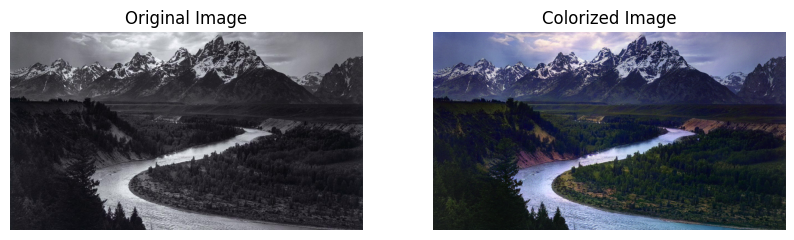

In [16]:
# Example usage within Colab
image_url = 'https://i.imgur.com/FdDe4Tw.jpeg'
color(image_url)